### **TRABAJO PRÁCTICO N° 2: Modelo predictivo de lluvia en Australia**
---
 2do cuatrimestre - Año 2025

| **Integrantes**           | **Legajo** |
|---------------------------|------------|
| Casado, Gustavo.          | C-7296/6   |
| Martinez Dufour, Caterina | M-7169/2   |

**Docentes:** *Joel Spak* - *Agustín Almada* - *Bruno Cocitto López*

**Fecha límite de entrega item 1, 2, 3:** 21/10

**Fecha límite de entrega item 4, 5, 6, 7:** 07/11

**Fecha límite de entrega item 8, 9, 10, 11:** 29/11

### Descripción del dataset
---
En este trabajo, nuestro objetivo es **predecir futuros dias donde llovera en Australia**.  El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no en la columna ‘RainTomorrow’. El objetivo del trabajo práctico es armar un ejecutable de Docker para predecir, a las 23:59:59hs de cada día, si el día siguiente va a llover o no.


#### Variables del conjunto de datos  

**Variables explicativas:**  
- **Date**: Fecha en la que se registraron los datos.
- **Location**: Nombre de la zona donde se obtuvo la observación.
- **MinTemp**: Temperatura mínima en grados (°C).
- **MaxTemp**: Temperatura máxima en grados (°C).
- **Rainfall**: Precipitación en milímetros (mm).
- **Evaporation**: Cantidad de agua evaporada en milímetros (mm).
- **Sunshine**: 
- **WindGustDir**:  Dirección del viento.
- **WindGustSpeed**: Velocidad del viento (km/h).
- **WindDir9am**: Dirección del viento a las 9am
- **WindDir3pm**: Dirección del viento a las 3pm
- **WindSpeed9am**: Velocidad del viento a las 9am (km/h).
- **WindSpeed3pm**: Velocidad del viento a las 3pm (km/h).
- **Humidity9am**: Humedad relativa a las 9am (%).
- **Humidity3pm**:  Humedad relativa a las 3pm (%).
- **Pressure9am**: Presión atmosférica a las 9am (hPa).
- **Pressure3pm**: Presión atmosférica a las 3pm (hPa).
- **Cloud9am**: Cantidad de cielo cubierto con nubes a las 9am (octas).
- **Cloud3pm**: Cantidad de cielo cubierto con nubes a las 3pm (octas).
- **Temp9am**: Temperatura a las 9am (°C).
- **Temp3pm**: Temperatura a las 3pm (°C).
- **RainToday**:  Indicador si llovió ese dia (Yes/No)

**Variable objetivo (target):**  
- **RainTomorrow**: Indica si llovió al día siguiente (Yes/No)

In [1]:
# Librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

### Carga del dataset
---

Se utilizó la biblioteca pandas para leer los datos almacenados en el archivo CSV y convertirlos en un DataFrame. Para corroborar que los datos se hayan cargado correctamente, se visualizaron las primeras cinco filas mediante el método '.head()'. Además, se empleó el método '.info()' para obtener información general del dataset, verificar que el tipo de dato en cada variable es correcto, detectar la presencia de valores nulos y valores atípicos.

In [2]:
# Carga del dataset
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path)

### Transformación de clusters de ciudades a una nueva categoría "Regiones"
---

Se  solicita  en  primera  instancia  crear  clusters  con  las  ciudades del Dataset para 
catalogarlas en otra categoría: regiones. La cantidad de regiones será definida por 
cada  grupo,  observarlas  en  un  gráfico  de  latitud  y  longitud  para  acompañar  la 
decisión. (obtuve los datos de longitud y latitud en 'www.latlong.net')

In [3]:
len(df['Location'].unique())

49

In [4]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
renombrar = { 
    "BadgerysCreek": "Badgerys Creek", "CoffsHarbour": "Coffs Harbour", "NorahHead" : "Norah Head", "NorfolkIsland" : "Norfolk Island", "SydneyAirport": "Sydney Airport",
    "WaggaWagga" : "Wagga Wagga", "MountGinini": "Mount Ginini", "MelbourneAirport" : "Melbourne Airport", "Nhil" : "Nhill", "GoldCoast" : "Gold Coast", 
    "MountGambier" : "Mount Gambier", "PerthAirport" : "Perth Airport", "SalmonGums" : "Salmon Gums", "AliceSprings" : "Alice Springs", "PearceRAAF" : "RAFF Base Pearce"
}

# Renombra los nombres del dataset
df["Location"] = df["Location"].replace(renombrar)

In [6]:
coordenadas = {
    "Albury": (-36.073730, 146.913544), "Badgerys Creek": (-33.887421, 150.740509), "Cobar": (-31.494930, 145.840164), "Coffs Harbour": (-30.298613, 153.109390),
    "Moree": (-29.463551, 149.841721), "Newcastle": (-32.926670, 151.780014), "Norah Head": (-33.283340, 151.566116), "Norfolk Island": (-29.040834, 167.954712),
    "Penrith": (-33.752918, 150.690674), "Richmond": (-42.735809, 147.437088), "Sydney": (-33.868820, 151.209290), "Sydney Airport": (-33.939922, 151.175278),
    "Wagga Wagga": (-35.114750, 147.369614), "Williamtown": (-32.814999, 151.842773), "Wollongong": (-34.427811, 150.893066), "Canberra": (-35.280937, 149.130005),
    "Tuggeranong": (-35.424400, 149.088806), "Mount Ginini": (-37.828410, 140.780656), "Ballarat": (-37.562160, 143.850250), "Bendigo": (-36.759338, 144.283997),
    "Sale": (-38.107250, 147.067291), "Melbourne Airport": (-37.670528, 144.848938), "Melbourne": (-37.813629, 144.963058), "Mildura": (-34.210468, 142.142044),
    "Nhill": (-36.332472, 141.649494), "Portland": (-38.342281, 141.603958), "Watsonia": (-37.711699, 145.082002), "Dartmoor": (-37.919090, 141.274673),
    "Brisbane": (-27.470030, 153.022980), "Cairns": (-16.918550, 145.778061), "Gold Coast": (-28.001499, 153.428467), "Townsville": (-19.258965, 146.816956),
    "Adelaide": (-34.927170, 138.599533), "Mount Gambier": (-37.828411, 140.780655), "Nuriootpa": (-34.471859, 138.996216), "Woomera": (-31.200684, 136.825919),
    "Albany": (-35.023819, 117.884727), "Witchcliffe": (-34.025699, 115.100107), "RAFF Base Pearce": (-17.591089, 123.777382), "Perth Airport": (-31.932739, 115.960258),
    "Perth": (-31.950527, 115.860458), "Salmon Gums": (-32.982075, 121.644170), "Walpole": (-34.976129, 116.731910), "Hobart": (-42.881901, 147.323807),
    "Launceston": (-41.437019, 147.139389), "Alice Springs": (-23.700680, 133.880707), "Darwin": (-12.463440, 130.845642), "Katherine": (-14.464970, 132.264267),
    "Uluru": (-25.344427, 131.036880)
}

In [7]:
df['Latitud'] = df['Location'].map(lambda x: coordenadas.get(x, (None, None))[0])
df['Longitud'] = df['Location'].map(lambda x: coordenadas.get(x, (None, None))[1])

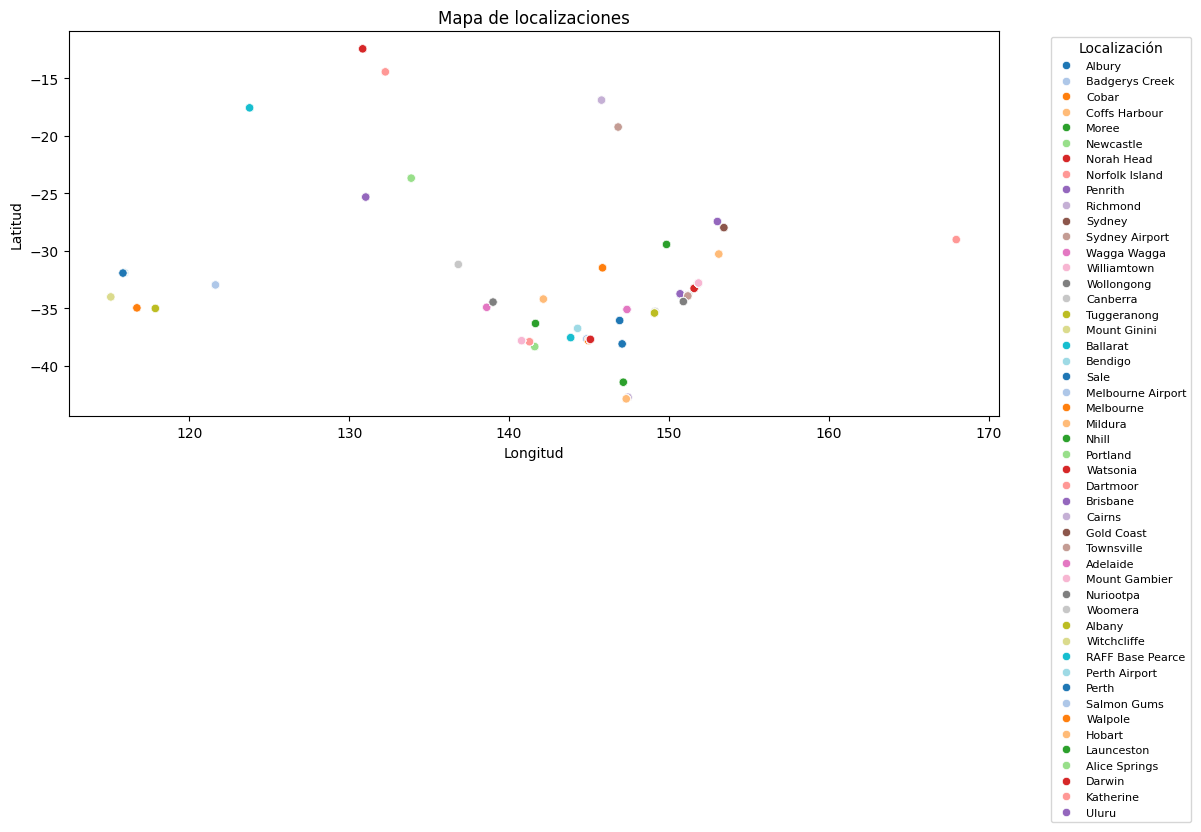

In [8]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Longitud', y='Latitud', data=df, hue='Location', palette='tab20')
plt.title('Mapa de localizaciones')
plt.legend(title="Localización", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

Para determinar el número óptimo de regiones en las que se agrupan las zonas donde se tomaron datos sobre la lluvia, se empleó el método del Codo. Este método utiliza k-means para un rango de valores de k y calcula la inercia para cada iteración. Para saber que valor seleccionar, observamos el gráfico del codo

In [9]:
X = df[['Latitud', 'Longitud']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

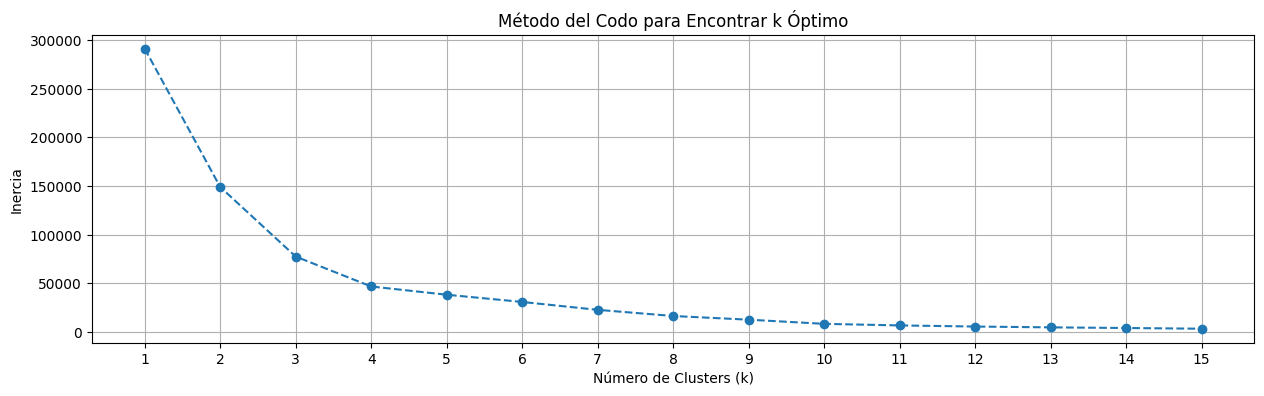

In [10]:
inertias = []
max_k = 15

# Calculamos la inercia para cada k
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(15,4))
plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar k Óptimo')
plt.grid(True)
plt.xticks(range(1, max_k + 1))
plt.show()

Este método muestra que hay un quiebre en k = 4 debido a que se ve una caída fuerte hasta este valor y luego el descenso es mucho más leve. Es por esta razón que podemos concluir que el valor optimo para dividir las localizaciones será en 4 regiones (norte, sur, este y oeste).

In [11]:
kmeans = KMeans(n_clusters = 4, random_state=42, n_init = 10)
df['Regiones'] = kmeans.fit_predict(X_scaled)

In [12]:
etiqueta = {0: 'Sur', 1: 'Norte', 2: 'Este', 3: 'Oeste'}
df['Regiones'] = df['Regiones'].map(etiqueta)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitud,Longitud,Regiones
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,-36.07373,146.913544,Sur
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,-36.07373,146.913544,Sur
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,-36.07373,146.913544,Sur
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,-36.07373,146.913544,Sur
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,-36.07373,146.913544,Sur


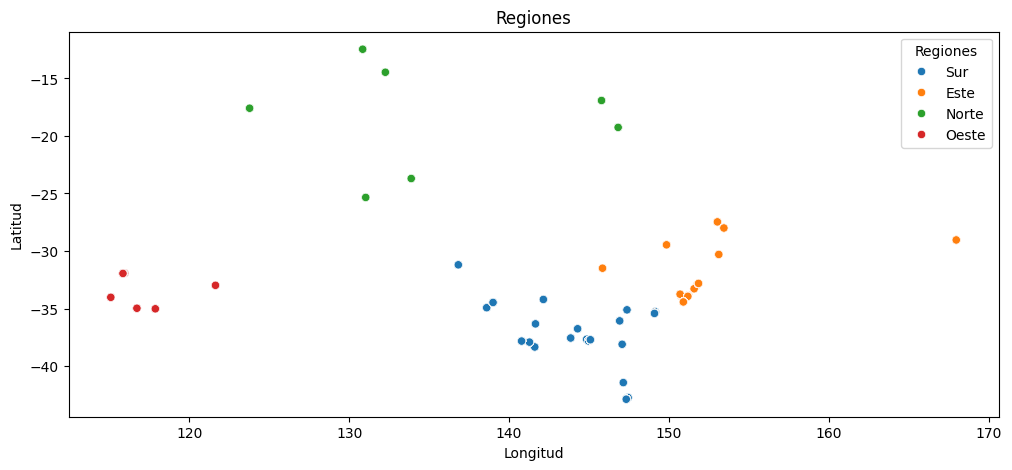

In [13]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Longitud", y="Latitud", hue="Regiones", data=df, palette="tab10")
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title(f'Regiones')
plt.legend(title="Regiones")
plt.show()

### Analisis descriptivo (consigna)
---

Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una  de  las  variables  involucradas,  detallando:  características,  comportamiento  y 
rango de variación. ¿Qué es cada variable?. Debe incluir: 

●  Análisis y decisión sobre datos faltantes. 

●  Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja) 

●  ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta? 

●  Codificación de variables categóricas (si se van a utilizar para predicción). 

●  Matriz de correlación de variables. 

●  Estandarización/escalado de datos. 

●  Validación cruzada train - test. Realizar una división del conjunto de datos en  conjuntos  de  entrenamiento  y  prueba  (y  si  se  quiere,  se  puede  incluir  validación, que luego será útil) en el MOMENTO donde lo crean adecuado

### Transformación del dataset original
---

#### Análisis y decisión sobre datos faltantes

In [14]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Latitud              0
Longitud             0
Regiones             0
dtype: int64

In [15]:
def calcular_porcentaje(faltante, total):
    if total == 0:
        return 0 # para evitar la division por cero
    
    porcentaje = (faltante / total) * 100
    return porcentaje 

def imprimir_porcentaje(porcentaje, columna):
    print(f"{columna}: {porcentaje:.2f}%")
    return

def datos_faltantes(columna):
    faltante = df[columna].isnull().sum()
    total = len(df)
    porcentaje = calcular_porcentaje(faltante, total)
    imprimir_porcentaje(porcentaje, columna)
    return 

print("Porcentaje de los valores faltantes de todas las columnas:")
for columna in df.columns:
    datos_faltantes(columna)

Porcentaje de los valores faltantes de todas las columnas:
Date: 0.00%
Location: 0.00%
MinTemp: 1.02%
MaxTemp: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
WindGustDir: 7.10%
WindGustSpeed: 7.06%
WindDir9am: 7.26%
WindDir3pm: 2.91%
WindSpeed9am: 1.21%
WindSpeed3pm: 2.11%
Humidity9am: 1.82%
Humidity3pm: 3.10%
Pressure9am: 10.36%
Pressure3pm: 10.33%
Cloud9am: 38.42%
Cloud3pm: 40.81%
Temp9am: 1.21%
Temp3pm: 2.48%
RainToday: 2.24%
RainTomorrow: 2.25%
Latitud: 0.00%
Longitud: 0.00%
Regiones: 0.00%


Podemos observar que las columnas que poseen un mayor valor de faltantes son los siguientes:
- Evaporation: 43.17%
- Sunshine: 48.01%
- Cloud9am: 38.42%
- Cloud3pm: 40.81%

El resto de valores tiene un porcentaje menor al 10% aproximadamente por lo que estos datos veria correcto imputarlos de ser necesario con algun metodo luego de dividir el dataset. El resto de columnas que posee esa gran cantidad de datos faltantes (30-50%) diria de eliminarlos del dataset debido que al ser un valor tan elevado de faltantes imputar los datos serian bastante lo que afectaria en un futuro al predecir el modelo. Además eliminaremos los datos que se encuentren en la variable target debido que no seria educado imputar sobre este.

In [16]:
columnas = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
df = df.drop(columns=columnas)

df.dropna(subset=['RainTomorrow'], inplace=True)

#### Transformación de datos y variables de interés

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Temp9am        141289 non-null  float64
 16  Temp3pm        139467 non-null  float64
 17  RainToday      140787 non-null  ob

Teniendo en cuenta las variables que poseemos, considero que al hacer la columna "Regiones" ya no es necesario mantener en el dataset "Location" debido que ya estamos representando estos datos por zonas. Por otro lado debemos transformar probablemente la columna "Date" para poder agregarlo al modelo (por ejemplo: dia de la semana, mes y año).

In [18]:
df['Date'] = pd.to_datetime(df['Date'])  

In [19]:
df['day_of_week'] = df['Date'].dt.dayofweek
def dia_semana(dia):
    if dia == 0:
        return 'Lunes'
    elif dia == 1:
        return 'Martes'
    elif dia == 2:
        return 'Miercoles'
    elif dia == 3:
        return 'Jueves'
    elif dia == 4:
        return 'Viernes'
    elif dia == 5:
        return 'Sabado'
    else:
        return 'Domingo'
    
df['day_of_week'] = df['day_of_week'].apply(dia_semana)

In [20]:
df['week'] = df['Date'].dt.day_of_week
def mes(d_mes):
    if d_mes == 0:
        return 'Enero'
    elif d_mes == 1:
        return 'Febrero'
    elif d_mes == 2:
        return 'Marzo'
    elif d_mes == 3:
        return 'Abril'
    elif d_mes == 4:
        return 'Mayo'
    elif d_mes == 5:
        return 'Junio'
    elif d_mes == 6:
        return 'Julio'
    elif d_mes == 7:
        return 'Agosto'
    elif d_mes == 8:
        return 'Septiembre'
    elif d_mes == 9:
        return 'Octubre'
    elif d_mes == 10:
        return 'Noviembre'
    elif d_mes == 11:
        return 'Diciembre'
    
df['week'] = df['week'].apply(mes)

In [21]:
df['Year'] = df['Date'].dt.year

In [22]:
# Eliminación de columnas que no son de interes
columnas = ['Date', 'Location']
df = df.drop(columns=columnas)

In [23]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitud,Longitud,Regiones,day_of_week,week,Year
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,...,16.9,21.8,No,No,-36.07373,146.913544,Sur,Lunes,Enero,2008
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,...,17.2,24.3,No,No,-36.07373,146.913544,Sur,Martes,Febrero,2008
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,...,21.0,23.2,No,No,-36.07373,146.913544,Sur,Miercoles,Marzo,2008
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,...,18.1,26.5,No,No,-36.07373,146.913544,Sur,Jueves,Abril,2008
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,...,17.8,29.7,No,No,-36.07373,146.913544,Sur,Viernes,Mayo,2008


### Validación cruzada train - test
---

El siguiente paso consiste en dividir el dataset en conjuntos de entrenamiento y prueba. Se separó el 80% de los datos para entrenamiento y el 20% restante para prueba.

In [24]:
# dividir df en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
train_df.shape, test_df.shape

((113754, 23), (28439, 23))

### Transformación del dataset
---

Luego de esto, realizamos un '.describe()' sobre las variables numericas y consideramos los resultados para analizar cada variable del dataset.

In [26]:
train_df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Latitud,Longitud,Year
count,113229.000000,113486.000000,112572.000000,106348.000000,112671.000000,111645.000000,112334.000000,110841.000000,102497.000000,102529.000000,113018.000000,111548.000000,113754.000000,113754.000000,113754.000000
mean,12.176037,23.222816,2.347680,39.957395,13.994169,18.626325,68.824764,51.466659,1017.651395,1015.258031,16.983173,21.681986,-32.713211,141.986990,2012.757802
std,6.398791,7.118185,8.466572,13.574900,8.884425,8.790884,19.063076,20.799362,7.111363,7.040286,6.491592,6.939722,6.580344,11.741153,2.541504
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,-7.200000,-5.400000,-42.881901,115.100107,2007.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,-36.759338,138.599533,2011.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,-34.025699,145.778061,2013.000000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,-31.200684,150.690674,2015.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1038.900000,40.200000,46.700000,-12.463440,167.954712,2017.000000


In [27]:
def imput_median(columna):
    mediana= train_df[columna].median()
    print(f"Mediana de {columna}: {round(mediana,2)}")
    print(f"Total de casos imputados con la mediana en train: { train_df[columna].isnull().sum()} ")
    print(f"Total de casos imputados con la mediana en test: {test_df[columna].isnull().sum()} ")
    return

In [28]:
def imput_mode(columna):
    moda = train_df[columna].mode()[0]
    print(f"Moda de {columna}: {moda}")
    print(f"Total de casos imputados con la mediana en train: { train_df[columna].isnull().sum()} ")
    print(f"Total de casos imputados con la mediana en test: {test_df[columna].isnull().sum()} ")
    return

In [29]:
imputer_median = SimpleImputer(strategy='median')      #Imputa con la mediana
imputer_mode = SimpleImputer(strategy='most_frequent') #Imputa con la moda

#### Analisis de las variables 'MinTemp' y 'MaxTemp':

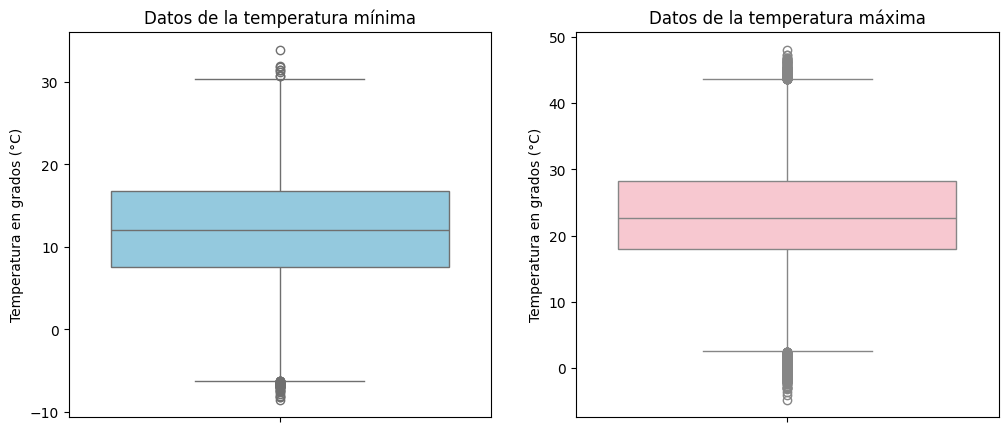

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Datos de la temperatura mínima")
sns.boxplot(train_df['MinTemp'], color="skyblue")
plt.ylabel('Temperatura en grados (°C)')

plt.subplot(1, 2, 2)
plt.title("Datos de la temperatura máxima")
sns.boxplot(train_df['MaxTemp'], color="pink")
plt.ylabel('Temperatura en grados (°C)')

plt.show()

Posee algunos outlier pero siento que son valores que pueden ser datos reales por ende no los eliminaria.

In [31]:
#Imputar con la mediana la columna "MinTemp" en train y test
imput_median('MinTemp')

train_df['MinTemp'] = imputer_median.fit_transform(train_df[['MinTemp']])
test_df['MinTemp'] = imputer_median.transform(test_df[['MinTemp']])

Mediana de MinTemp: 12.0
Total de casos imputados con la mediana en train: 525 
Total de casos imputados con la mediana en test: 112 


In [32]:
#Imputar con la mediana la columna "MaxTemp" en train y test
imput_median('MaxTemp')

train_df['MaxTemp'] = imputer_median.fit_transform(train_df[['MaxTemp']])
test_df['MaxTemp'] = imputer_median.transform(test_df[['MaxTemp']])

Mediana de MaxTemp: 22.6
Total de casos imputados con la mediana en train: 268 
Total de casos imputados con la mediana en test: 54 


#### Analisis de las variables 'WindGustDir', 'WindDir9am' y 'WindDir3am':

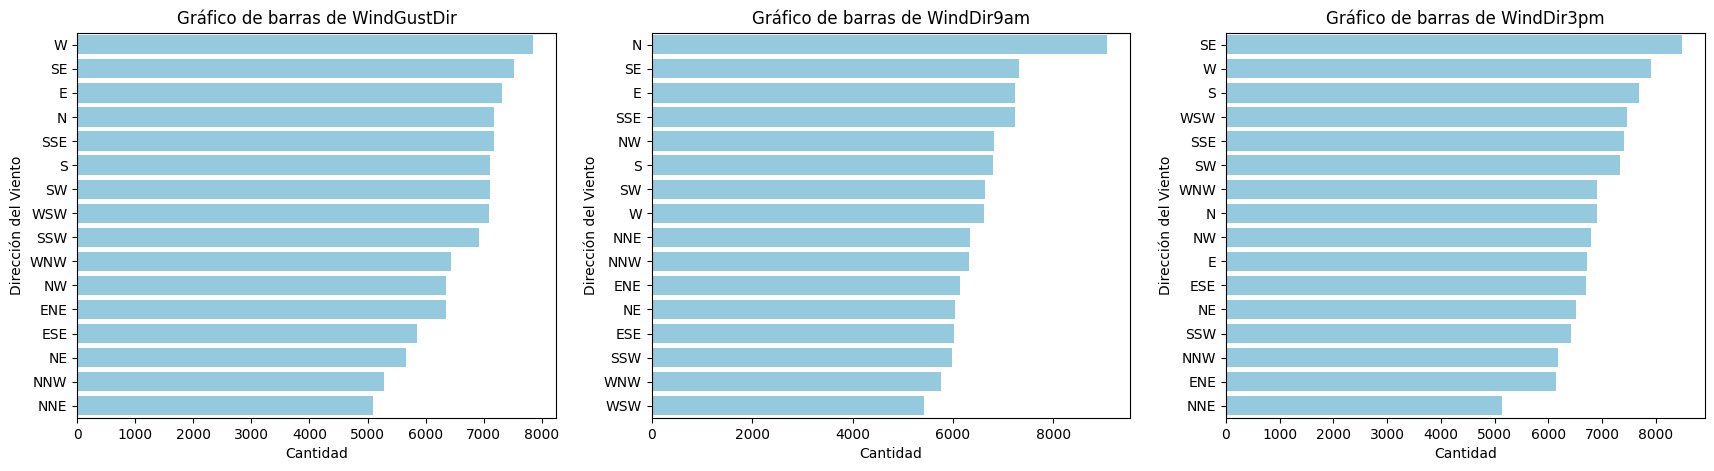

In [33]:
dir = train_df['WindGustDir'].value_counts()
dir_9 = train_df['WindDir9am'].value_counts()
dir_3 = train_df['WindDir3pm'].value_counts()

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.barplot(x=dir.values, y=dir.index, color = 'skyblue')
plt.title('Gráfico de barras de WindGustDir')
plt.xlabel('Cantidad')
plt.ylabel('Dirección del Viento')

plt.subplot(1,3,2)
sns.barplot(x=dir_9.values, y=dir_9.index, color = 'skyblue')
plt.title('Gráfico de barras de WindDir9am')
plt.xlabel('Cantidad')
plt.ylabel('Dirección del Viento')

plt.subplot(1,3,3)
sns.barplot(x=dir_3.values, y=dir_3.index, color = 'skyblue')
plt.title('Gráfico de barras de WindDir3pm')
plt.xlabel('Cantidad')
plt.ylabel('Dirección del Viento')

plt.show()

In [34]:
#WindGustDir: 7.10%
#WindDir9am: 7.26%
#WindDir3pm: 2.91%

Como es una variable categorica, podemos imputar por la moda (el valor más frecuente) ya que el porcentaje de sus faltantes es bajo

In [35]:
#Imputar con la mediana la columna "WindGustDir" en train y test
imput_mode('WindGustDir')

# Se utiliza .flatten() para convertir el resultado 2D del imputer a un formato 1D que espera pandas
train_df['WindGustDir'] = imputer_mode.fit_transform(train_df[['WindGustDir']]).flatten()
test_df['WindGustDir'] = imputer_mode.transform(test_df[['WindGustDir']]).flatten()

Moda de WindGustDir: W
Total de casos imputados con la mediana en train: 7458 
Total de casos imputados con la mediana en test: 1872 


In [36]:
#Imputar con la mediana la columna "WindDir9am" en train y test
imput_mode('WindDir9am')

train_df['WindDir9am'] = imputer_mode.fit_transform(train_df[['WindDir9am']]).flatten()
test_df['WindDir9am'] = imputer_mode.transform(test_df[['WindDir9am']]).flatten()

Moda de WindDir9am: N
Total de casos imputados con la mediana en train: 8036 
Total de casos imputados con la mediana en test: 1977 


In [37]:
#Imputar con la mediana la columna "WindDir3pm" en train y test
imput_mode('WindDir3pm')

train_df['WindDir3pm'] = imputer_mode.fit_transform(train_df[['WindDir3pm']]).flatten()
test_df['WindDir3pm'] = imputer_mode.transform(test_df[['WindDir3pm']]).flatten()

Moda de WindDir3pm: SE
Total de casos imputados con la mediana en train: 3023 
Total de casos imputados con la mediana en test: 755 


#### Analisis de las variables 'WindGustSpeed', 'WindSpeed9am' y 'WindSpeed3pm':

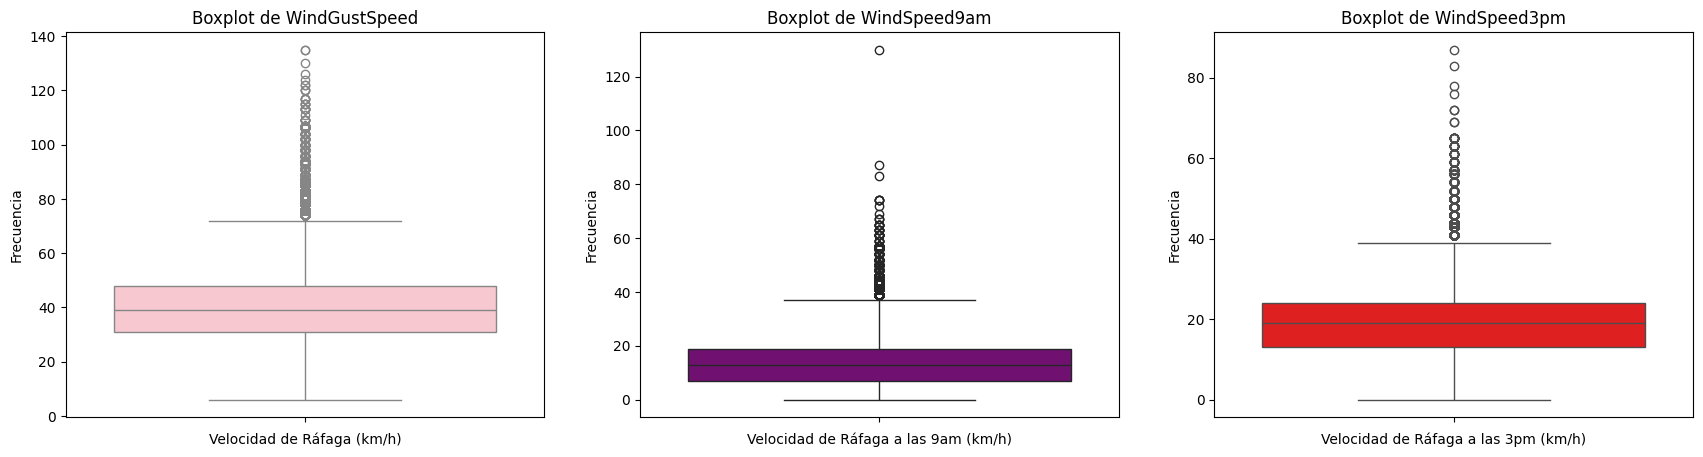

In [38]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.boxplot(train_df['WindGustSpeed'], color='pink')
plt.title('Boxplot de WindGustSpeed')
plt.xlabel('Velocidad de Ráfaga (km/h)')
plt.ylabel('Frecuencia')

plt.subplot(1,3,2)
sns.boxplot(train_df['WindSpeed9am'], color='purple')
plt.title('Boxplot de WindSpeed9am')
plt.xlabel('Velocidad de Ráfaga a las 9am (km/h)')
plt.ylabel('Frecuencia')

plt.subplot(1,3,3)
sns.boxplot(train_df['WindSpeed3pm'], color='red')
plt.title('Boxplot de WindSpeed3pm')
plt.xlabel('Velocidad de Ráfaga a las 3pm (km/h)')
plt.ylabel('Frecuencia')

plt.show()

In [39]:
#Imputar con la mediana la columna "WindGustSpeed" en train y test
imput_median('WindGustSpeed')

train_df['WindGustSpeed'] = imputer_median.fit_transform(train_df[['WindGustSpeed']])
test_df['WindGustSpeed'] = imputer_median.transform(test_df[['WindGustSpeed']])

Mediana de WindGustSpeed: 39.0
Total de casos imputados con la mediana en train: 7406 
Total de casos imputados con la mediana en test: 1864 


In [40]:
#Imputar con la mediana la columna "WindSpeed9am" en train y test
imput_median('WindSpeed9am')

train_df['WindSpeed9am'] = imputer_median.fit_transform(train_df[['WindSpeed9am']])
test_df['WindSpeed9am'] = imputer_median.transform(test_df[['WindSpeed9am']])

Mediana de WindSpeed9am: 13.0
Total de casos imputados con la mediana en train: 1083 
Total de casos imputados con la mediana en test: 265 


In [41]:
#Imputar con la mediana la columna "WindSpeed3pm" en train y test
imput_median('WindSpeed3pm')

train_df['WindSpeed3pm'] = imputer_median.fit_transform(train_df[['WindSpeed3pm']])
test_df['WindSpeed3pm'] = imputer_median.transform(test_df[['WindSpeed3pm']])

Mediana de WindSpeed3pm: 19.0
Total de casos imputados con la mediana en train: 2109 
Total de casos imputados con la mediana en test: 521 


#### Analisis de las variables 'Humidity9am' y 'Humidity3pm':

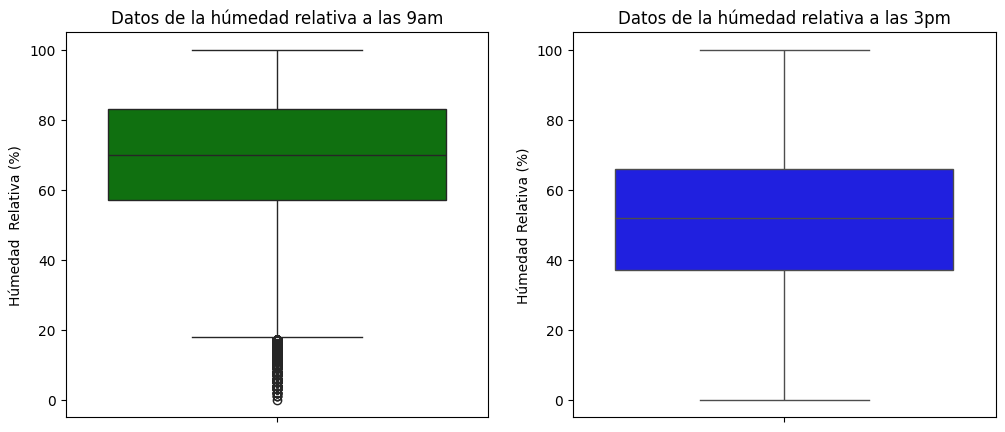

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Datos de la húmedad relativa a las 9am")
sns.boxplot(train_df['Humidity9am'], color="green")
plt.ylabel('Húmedad  Relativa (%)')

plt.subplot(1, 2, 2)
plt.title("Datos de la húmedad relativa a las 3pm")
sns.boxplot(train_df['Humidity3pm'], color="blue")
plt.ylabel('Húmedad Relativa (%)')

plt.show()

In [43]:
#Humidity9am: 1.82%
#Humidity3pm: 3.10%

In [44]:
#Imputar con la mediana la columna "Humidity9am" en train y test
imput_median('Humidity9am')

train_df['Humidity9am'] = imputer_median.fit_transform(train_df[['Humidity9am']])
test_df['Humidity9am'] = imputer_median.transform(test_df[['Humidity9am']])

Mediana de Humidity9am: 70.0
Total de casos imputados con la mediana en train: 1420 
Total de casos imputados con la mediana en test: 354 


In [45]:
#Imputar con la mediana la columna "Humidity3pm" en train y test
imput_median('Humidity3pm')

train_df['Humidity3pm'] = imputer_median.fit_transform(train_df[['Humidity3pm']])
test_df['Humidity3pm'] = imputer_median.transform(test_df[['Humidity3pm']])

Mediana de Humidity3pm: 52.0
Total de casos imputados con la mediana en train: 2913 
Total de casos imputados con la mediana en test: 697 


#### Analisis de las variables 'Pressure9am' y 'Pressure3pm':

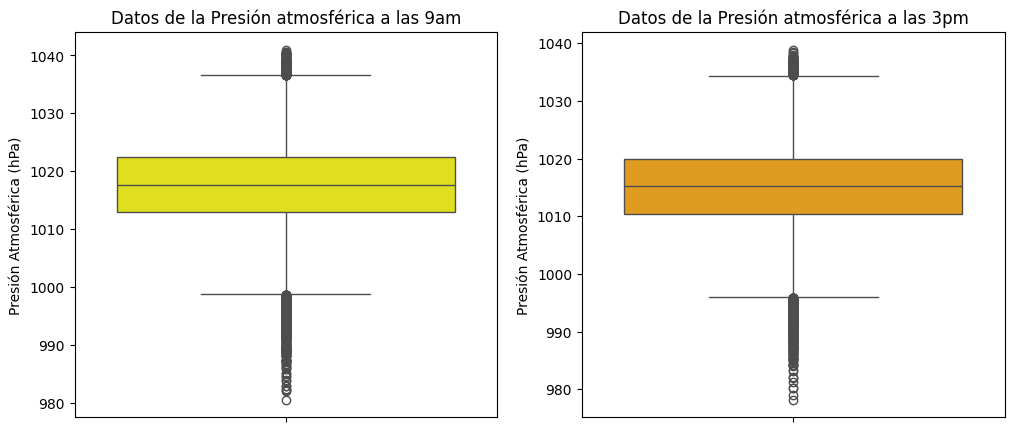

In [46]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Datos de la Presión atmosférica a las 9am")
sns.boxplot(train_df['Pressure9am'], color="yellow")
plt.ylabel('Presión Atmosférica (hPa)')

plt.subplot(1, 2, 2)
plt.title("Datos de la Presión atmosférica a las 3pm")
sns.boxplot(train_df['Pressure3pm'], color="orange")
plt.ylabel('Presión Atmosférica (hPa)')

plt.show()

In [47]:
#Pressure9am: 10.36%
#Pressure3pm: 10.33%

In [48]:
#Imputar con la mediana la columna "Pressure9am" en train y test
imput_median('Pressure9am')

train_df['Pressure9am'] = imputer_median.fit_transform(train_df[['Pressure9am']])
test_df['Pressure9am'] = imputer_median.transform(test_df[['Pressure9am']])

Mediana de Pressure9am: 1017.6
Total de casos imputados con la mediana en train: 11257 
Total de casos imputados con la mediana en test: 2757 


In [49]:
#Imputar con la mediana la columna "Pressure3pm" en train y test
imput_median('Pressure3pm')

train_df['Pressure3pm'] = imputer_median.fit_transform(train_df[['Pressure3pm']])
test_df['Pressure3pm'] = imputer_median.transform(test_df[['Pressure3pm']])

Mediana de Pressure3pm: 1015.2
Total de casos imputados con la mediana en train: 11225 
Total de casos imputados con la mediana en test: 2756 


#### Analisis de las variables 'Temp9am' y 'Temp3pm':

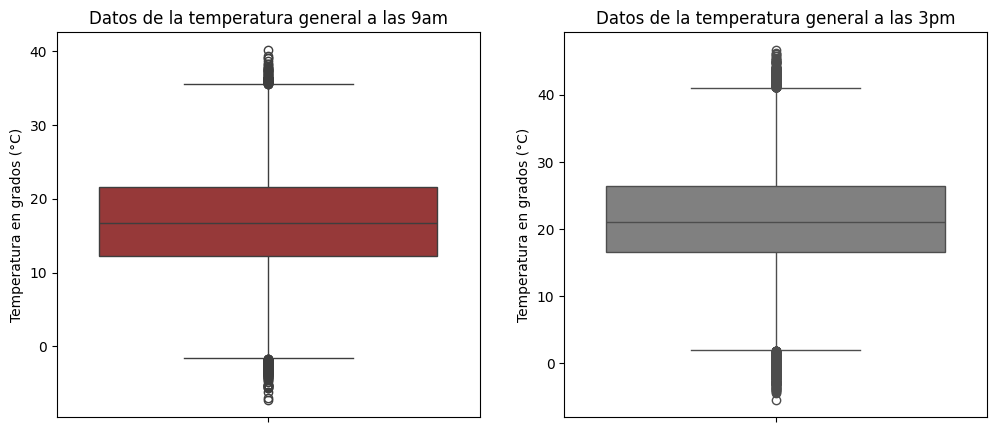

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Datos de la temperatura general a las 9am")
sns.boxplot(train_df['Temp9am'], color="brown")
plt.ylabel('Temperatura en grados (°C)')

plt.subplot(1, 2, 2)
plt.title("Datos de la temperatura general a las 3pm")
sns.boxplot(train_df['Temp3pm'], color="gray")
plt.ylabel('Temperatura en grados (°C)')

plt.show()

In [51]:
#Temp9am: 1.21%
#Temp3pm: 2.48%

In [52]:
#Imputar con la mediana la columna "Temp9am" en train y test
imput_median('Temp9am')

train_df['Temp9am'] = imputer_median.fit_transform(train_df[['Temp9am']])
test_df['Temp9am'] = imputer_median.transform(test_df[['Temp9am']])

Mediana de Temp9am: 16.7
Total de casos imputados con la mediana en train: 736 
Total de casos imputados con la mediana en test: 168 


In [53]:
#Imputar con la mediana la columna "Temp3pm" en train y test
imput_median('Temp3pm')

train_df['Temp3pm'] = imputer_median.fit_transform(train_df[['Temp3pm']])
test_df['Temp3pm'] = imputer_median.transform(test_df[['Temp3pm']])

Mediana de Temp3pm: 21.1
Total de casos imputados con la mediana en train: 2206 
Total de casos imputados con la mediana en test: 520 


#### Analisis de la variable 'Rainfall':

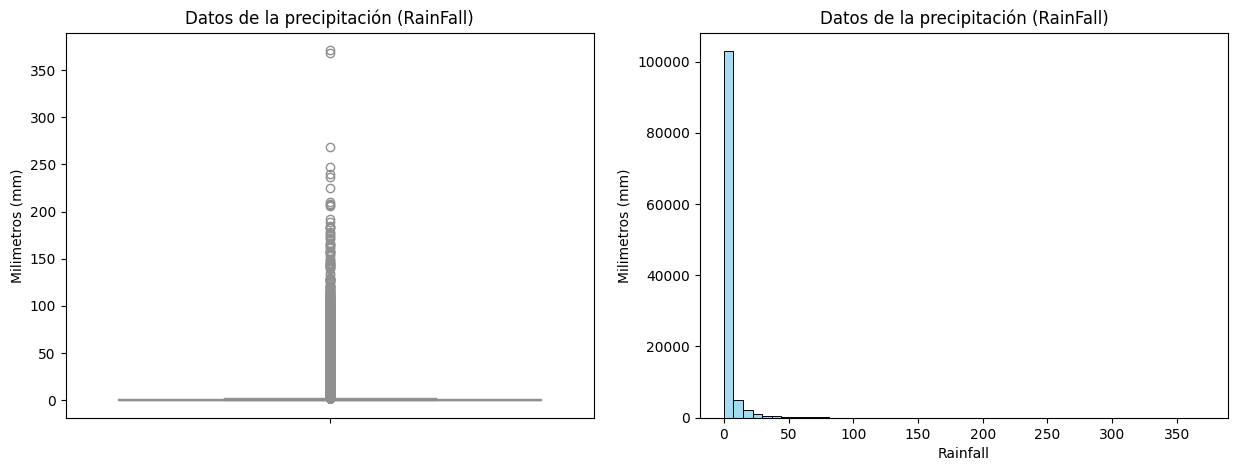

In [54]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Datos de la precipitación (RainFall)")
sns.boxplot(train_df['Rainfall'], color="lightyellow")
plt.ylabel('Milimetros (mm)')

plt.subplot(1,2,2)
plt.title("Datos de la precipitación (RainFall)")
sns.histplot(data=train_df['Rainfall'], color="skyblue", bins=50)
plt.ylabel('Milimetros (mm)')

plt.show()

In [55]:
#Rainfall: 2.24%

In [56]:
#Imputar con la mediana la columna "Rainfall" en train y test
imput_median('Rainfall')

train_df['Rainfall'] = imputer_median.fit_transform(train_df[['Rainfall']])
test_df['Rainfall'] = imputer_median.transform(test_df[['Rainfall']])

Mediana de Rainfall: 0.0
Total de casos imputados con la mediana en train: 1182 
Total de casos imputados con la mediana en test: 224 


#### Analisis de la variable 'RainToday':

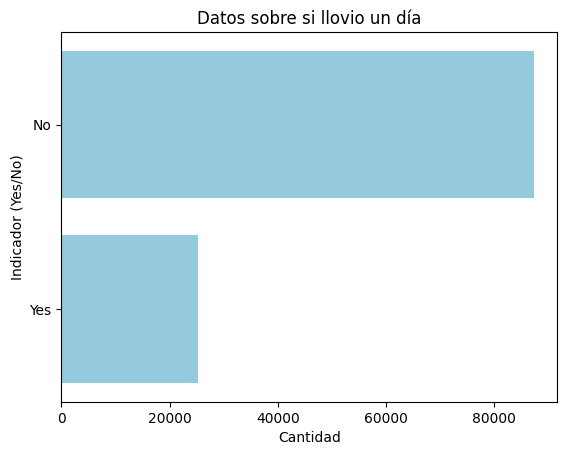

In [57]:
rain_t = train_df['RainToday'].value_counts()

plt.figure()
sns.barplot(x=rain_t.values, y=rain_t.index, color = 'skyblue')
plt.title('Datos sobre si llovio un día')
plt.xlabel('Cantidad')
plt.ylabel('Indicador (Yes/No)')

plt.show()

In [58]:
#RainToday: 2.24%

Como es una variable categorica, podemos imputar por la moda (el valor más frecuente) ya que el porcentaje de sus faltantes es bajo

In [59]:
#Imputar con la mediana la columna "RainToday" en train y test
imput_mode('RainToday')

train_df['RainToday'] = imputer_mode.fit_transform(train_df[['RainToday']]).flatten()
test_df['RainToday'] = imputer_mode.transform(test_df[['RainToday']]).flatten()

Moda de RainToday: No
Total de casos imputados con la mediana en train: 1182 
Total de casos imputados con la mediana en test: 224 


### Escalado de datos y codificación de variables categoricas
---

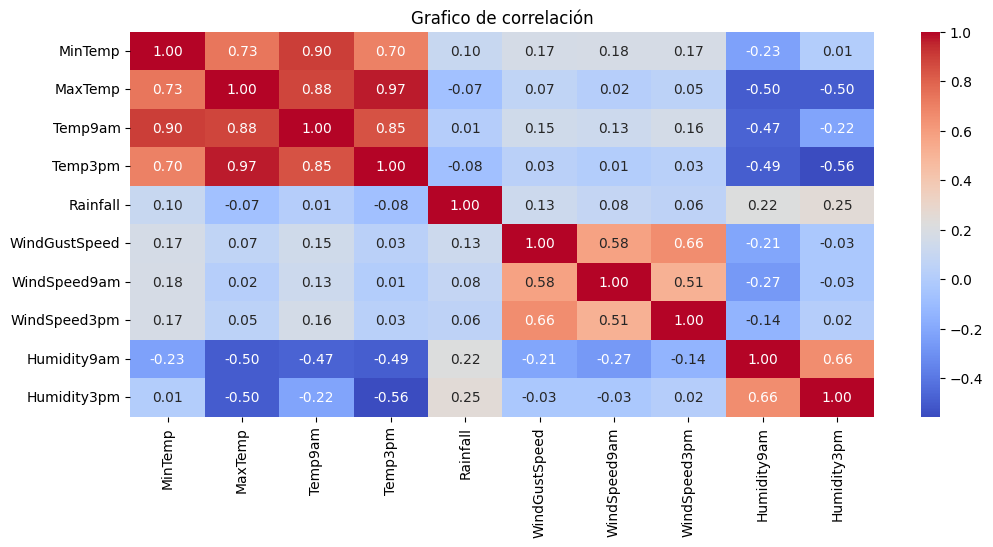

In [60]:
columnas = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']
corr_matrix = train_df[columnas].corr()

plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Grafico de correlación")
plt.show()

In [61]:
train_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitud', 'Longitud',
       'Regiones', 'day_of_week', 'week', 'Year'],
      dtype='object')

In [62]:
encoder = OneHotEncoder(sparse_output=False)

In [63]:
# Indicador de si llovio en el día (RainToday)
encoder_rain_d = encoder.fit_transform(train_df[["RainToday"]])
train_df[encoder.get_feature_names_out(["RainToday"])] = encoder_rain_d

# Indicador de si llovera mañana (RainTomorrow)
encoder_rain_t = encoder.fit_transform(train_df[["RainTomorrow"]])
train_df[encoder.get_feature_names_out(["RainTomorrow"])] = encoder_rain_t

# Regiones
encoder_region = encoder.fit_transform(train_df[["Regiones"]])
train_df[encoder.get_feature_names_out(["Regiones"])] = encoder_region

# día de la semana
encoder_day = encoder.fit_transform(train_df[["day_of_week"]])
train_df[encoder.get_feature_names_out(["day_of_week"])] = encoder_day

# mes
encoder_week = encoder.fit_transform(train_df[["week"]])
train_df[encoder.get_feature_names_out(["week"])] = encoder_week

In [64]:
#Se hacen lo mismo en el dataset de prueba (test)

# Indicador de si llovio en el día (RainToday)
encoder_rain_d = encoder.fit_transform(test_df[["RainToday"]])
test_df[encoder.get_feature_names_out(["RainToday"])] = encoder_rain_d

# Indicador de si llovera mañana (RainTomorrow)
encoder_rain_t = encoder.fit_transform(test_df[["RainTomorrow"]])
test_df[encoder.get_feature_names_out(["RainTomorrow"])] = encoder_rain_t

# Regiones
encoder_region = encoder.fit_transform(test_df[["Regiones"]])
test_df[encoder.get_feature_names_out(["Regiones"])] = encoder_region

# día de la semana
encoder_day = encoder.fit_transform(test_df[["day_of_week"]])
test_df[encoder.get_feature_names_out(["day_of_week"])] = encoder_day

# mes
encoder_week = encoder.fit_transform(test_df[["week"]])
test_df[encoder.get_feature_names_out(["week"])] = encoder_week

In [65]:
train_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,day_of_week_Miercoles,day_of_week_Sabado,day_of_week_Viernes,week_Abril,week_Enero,week_Febrero,week_Julio,week_Junio,week_Marzo,week_Mayo
18401,15.1,23.9,0.0,SSW,67.0,NW,W,19.0,22.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127797,9.7,14.2,7.6,WSW,50.0,WNW,W,15.0,28.0,91.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40012,13.2,25.4,0.0,ENE,30.0,W,E,6.0,17.0,79.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130914,7.6,14.8,0.0,WNW,94.0,WNW,WNW,30.0,35.0,52.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41742,12.9,22.2,0.0,S,37.0,SW,SSE,15.0,20.0,69.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
